# Lab 01: Data pre-processing

- Student ID: 21127129 
- Student name: Lê Nguyễn Kiều Oanh 

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'/home/kolee/miniconda3/envs/dm-env/bin/python'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv('data/spaceX_laucnh.csv')

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

- Each line in the dataset represents information about a SpaceX rocket launch and landing. It information about launch dates, launchers, payloads, rockets, launchers, landing pad wings and landing results of each space mission.

- Yes, it matters if the lines in a dataset have different meanings, especially when performing data analysis. Consistency and clarity in the dataset are crucial for accurate interpretation and meaningful insights. 
When lines have different meanings in the datas: 
    + **Interpretation Issues**: Different meanings can lead to confusion during data analysis. Analysts may misinterpret or misapply the data, leading to flawed conclusions.
    + **Inaccurate Results**: If the lines represent heterogeneous data or inconsistent attributes, the analysis may produce inaccurate or misleading results. This can adversely affect decision-making processes based on the analysis.
    + **Data Integrity**: Inconsistent meanings may indicate underlying issues with data quality and integrity. It suggests potential errors, inconsistencies, or missing information that need to be addressed before conducting meaningful analysis.
    + **Efficiency**: Analyzing a dataset with inconsistent meanings can be time-consuming and inefficient. Analysts may need to spend extra effort understanding and reconciling the discrepancies in the data, slowing down the analysis process.
    + **Reliability**: The reliability of the analysis output heavily depends on the quality and consistency of the dataset. Inconsistent meanings can undermine the reliability of the analysis, reducing its usefulness for making informed decisions.t:ysis purposes.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# YOUR CODE HERE
num_duplicated_rows = raw_df.duplicated(keep='first').sum()

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
metadata = pd.read_json('data/metadata.json')

In [13]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

| **COLUMN**            |**SUITABLE DATATYPE**|**REASON TO CHOICE DATATYPE**               |
|:----------------------|:------------------------|:-------------------|
|`uct_time`|datetime|Datetime data type is ideal for representing date and time information, providing easy manipulation, comparison, and formatting of date-time values.|
|`payloads`|list of dictionaries|Since payloads can vary in number and attributes, storing them as a list of dictionaries allows for flexible and structured storage of payload information, with each dictionary representing a payload.|
|`rocket_name`|string|Rocket names are textual data and can be represented efficiently using string data type.|ity and efficiency in storage and manipulation.
|`rocket_boosters`| integer| The number of boosters is a discrete numerical value, making integer data type appropriate for storage and manipulation.
|`rocket_height`| float|Rocket height can be a fractional value, so float data type is appropriate to store height information accurately.
|`rocket_diameter`| float|Rocket diameter can be a fractional value, so float data type is appropriate to store diameter information accurately.
|`rocket_mass`| float|Rocket mass can be a fractional value, so float data type is appropriate to store mass information accurately.
|`launchpad_name`| string|Launchpad names are textual data and can be represented efficiently using string data type.
|`launchpad_region`| string|Launchpad regions are textual data and can be represented efficiently using string data type.
|`launchpad_geo`| tuple (float, float) or string|Geo location can be represented as a tuple of latitude and longitude (float, float) or as a string in a standardized format such as "latitude, longitude".
|`landpad`| dictionary or JSON|Landpad information can be represented as a structured data with various attributes, making dictionary or JSON data type suitable for storage.
|`landpad_name`| string|Landing pad names are textual data and can be represented efficiently using string data type.
|`landpad_type`| string|Landing pad types are textual data and can be represented efficiently using string data type.
|`landpad_region`| string|Landing pad regions are textual data and can be represented efficiently using string data type.
|`landpad_geo`| tuple (float, float) or string|Geo location can be represented as a tuple of latitude and longitude (float, float) or as a string in a standardized format such as "latitude, longitude".
|`outcome`| bool|Boolean data type is ideal for representing binary outcomes such as success or failure, providing simplicity and efficiency in storage and manipulation.fficiency in storage and manipulation.

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtype = raw_df.dtypes

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


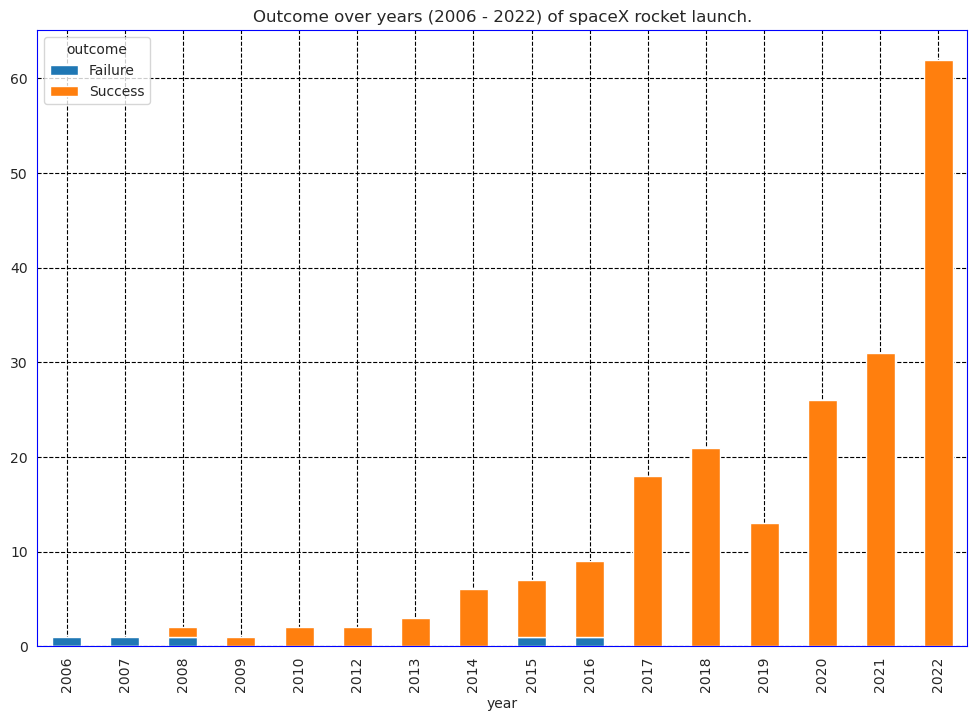

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
+ In general, the number of rockets launched each year increases over time.
+ The year 2022 launches the most times and achieves a high number of successes (launched 60 times and all were successful)
+ In the first years, most launches failed. 2006 and 2007 zoomed the least and both failed
+ The year 2008 was the beginning of successful rocket launches
+ Over time, the results will gradually increase and use the maximum number of zooms
+ The symbol can successfully implement SpaceX's symbol in the field of rocket launch. SpaceX has achieved a high success rate and continuously improves its techniques year after year. The chart is a testament to SpaceX's strong development in the field of space technology.ụ.

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return (s.isna().mean() * 100).round(1)

def median(df):
    # TODO:
    # YOUR CODE HERE
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return (df.quantile(0.75)).round(1)

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE
# num_col_df.drop(columns=['landpad'], inplace=True)
# raw_df.drop(columns=['landpad'], inplace=True)

def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 70.0) -> pd.DataFrame:
    """Drop missing features from Pandas dataframe base on given threshold.

    Args:
        df (pd.DataFrame): Input dataframe for processing.
        missing_lst (dict, optional): Dict missing value rate which calculated from previous stage. Defaults to dict(num_col_info_df.iloc[0]).
        threshold (float, optional): User threshold for dropping. Defaults to 70.0.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")
        
    return df_cp
    
raw_df = drop_missing_features(raw_df, dict(num_col_info_df.iloc[0]))
num_col_df = drop_missing_features(num_col_df, dict(num_col_info_df.iloc[0]))

[LOG] Dropped column(s): landpad
[LOG] Dropped column(s): landpad


In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
df_copy = num_col_df.copy()
cols = ['rocket_height', 'rocket_diameter', 'rocket_mass']
for col in cols:
    df_copy[col].fillna((df_copy[col].mean()), inplace=True)
    
df_copy_1 = df_copy.rename(columns={'rocket_boosters': 'mean_fill_rocket_boosters', 'rocket_height': 'mean_fill_rocket_height', 'rocket_diameter': 'mean_fill_rocket_diameter', 'rocket_mass': 'mean_fill_rocket_mass'})


In [26]:
# YOUR CODE HERE
## Median fill
df_copy = num_col_df.copy()
cols = ['rocket_height', 'rocket_diameter', 'rocket_mass']
for col in cols:
    df_copy[col].fillna((df_copy[col].median()), inplace=True)
    
df_copy_2 = df_copy.rename(columns={'rocket_boosters': 'median_fill_rocket_boosters', 'rocket_height': 'median_fill_rocket_height', 'rocket_diameter': 'median_fill_rocket_diameter', 'rocket_mass': 'median_fill_rocket_mass'})


In [27]:
# YOUR CODE HERE
## Mode fill
df_copy = num_col_df.copy()
cols = ['rocket_height', 'rocket_diameter', 'rocket_mass']
for col in cols:
    df_copy[col].fillna((df_copy[col].mode()), inplace=True)
    
df_copy_3 = df_copy.rename(columns={'rocket_boosters': 'mode_fill_rocket_boosters', 'rocket_height': 'mode_fill_rocket_height', 'rocket_diameter': 'mode_fill_rocket_diameter', 'rocket_mass': 'mode_fill_rocket_mass'})

num_col_df = pd.concat([num_col_df, df_copy_1, df_copy_2, df_copy_3], axis=1)

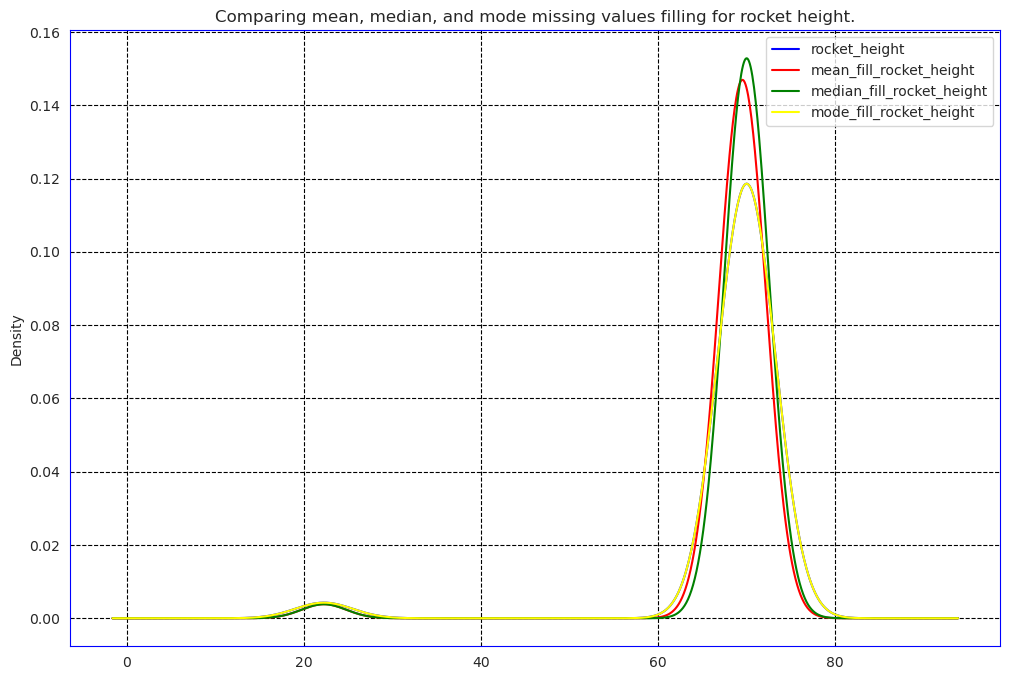

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
+ Regarding the 3 lines representing 3 ways to fill in data for the `rocket_height` column:
     + The curve of the values filled with mode has a shape that almost coincides with the original values before filling of the `rocket_height` column. From there, it shows that the data of this column is discrete and not continuous
     + The line representing how to fill in the mean has a difference compared to the shape of the column before filling in
     + Finally, the line representing the median filling method has the most difference among the three methods.
+ About the distribution of `rocket_height` column data:
   + Most column values are concentrated in two value ranges: 20 and 70

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

+ Regarding the anomaly of the `rocket_height` column:
     + In the `raw_df` data set there are only 3 types of `rocket_name` and corresponding to each type is 1 `rocket_height`. `Rocket_name:` **Falcon 9** and **Falcon Heavy** have the same `rocket_height` value of 70 and `Falcon 1` has a height of 22.25
+ About how to fill in missing data for column `rocket_height`:
   + We will rely on the anomaly pointed out in the line above to fill in the value for the `rocket_height` column, that is, based on `rocket_name`
​

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    rg = raw_df.groupby('rocket_name')['rocket_height'].agg(['min', 'max']).loc[rocket_name]
    return tuple(rg)


In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    for i in range(len(cp_df)):
        if np.isnan(cp_df.at[i,'rocket_height']):
            cp_df.at[i, 'rocket_height'] = checking_range(cp_df.at[i, 'rocket_name'])[0]
    return cp_df
    
raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
# YOUR CODE HERE
raw_df['rocket_diameter'].fillna((raw_df['rocket_diameter'].mean()), inplace=True)
raw_df['rocket_mass'].fillna((raw_df['rocket_mass'].mean()), inplace=True)

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

YOUR ANSWER HERE
+ **Discrete Variable**: `rocket_boosters`
    + Reason: `rocket_boosters` is the number of boosters on the rocket, this variable is countable, so it is a discrete variable
+ **Continous Variable**: `rocket_height`, `rocket_diameter`, `rocket_mass`
    + Reason: all three of the above attributes have values that can only be measured by tools or equipment and cannot be counted, they are continuous variables.

### Exploring non-numerical attributes

In [37]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [38]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    # Khởi tạo một danh sách rỗng để lưu trữ các từ điển
    if s== '[]':
        return '[]'
    dict_list = []
        
    # Loại bỏ dấu ngoặc vuông bao quanh và phân tách chuỗi bằng dấu phẩy
    s = s.strip('[]')
    dict_strs = s.split('}, {')
    
    # Duyệt qua danh sách các chuỗi từ điển
    for dict_str in dict_strs:
        # Loại bỏ các khoảng trắng và dấu ngoặc nhọn
        dict_str = dict_str.strip('{}')
        # Phân tách mỗi chuỗi từ điển bằng dấu hai chấm để lấy các cặp key-value
        key_values = dict_str.split(',')
        # Tạo một từ điển từ các cặp key-value
        dict_entry = {}
        for key_value in key_values:
            key, value = key_value.split(':')
            # Loại bỏ các khoảng trắng và dấu nháy đơn
            key = key.strip().strip('\'\"')
            value = value.strip()
            # Chuyển đổi chuỗi 'None' thành đối tượng None
            if value == 'None':
                value = None
            # Chuyển đổi thành số nếu đối tượng là số 
            # elif value.isdigit():
            #     value = int(value)
            # Loại bỏ dấu nháy đơn của value 
            else:
                value = value.strip('\'\"')
            # Thêm cặp key-value vào từ điển
            dict_entry[key] = value
        # Thêm từ điển vào danh sách
        dict_list.append(dict_entry)
    return dict_list


Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [39]:
# TODO:
# YOUR CODE HERE
df = raw_df.copy()
df["payloads"] = df["payloads"].apply(str2dict)

df = df.explode(column='payloads')

cate_col_df = df.select_dtypes(include=['object'])

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [40]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,1,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...",{'[]': 100.0},"{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [41]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

YOUR ANSWER HERE

Consider the missing rates of the three columns `landpad_name`, `landpad_type` and `landpad_zone` which are 27.3%, 23.9% and 47.4% respectively, all less than 70%. More specifically, the columns `landpad_name` and `landpad_type` have a missing rate of less than 30%, so we should fill them in without deleting them to avoid losing important data. As for the `landpad_area` column, the missing rate is nearly 50%, so if we don't have any information that can be filled in, we should delete it because this missing rate is quite high. If you fill in too many values, it will affect the next steps. It's best to consider what rules or relationships exist between these 3 columns so we can fill in the data. This will increase our filling accuracy a bit.

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [42]:
# TODO:
# YOUR CODE HERE
columns = ['landpad_name', 'landpad_type', 'landpad_region']
mask = cate_col_df[columns].isnull().all(axis=1)
cate_col_df = cate_col_df[~mask]

In [43]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [44]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,30.8,0.0,0.0
num_values,158,0,2,3,2,3,6,3,2,5,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CASSIOPE': 0.6, 'DART': 0.6, 'GPS III S...",{},"{'Falcon 9': 98.1, 'Falcon Heavy': 1.9}","{'CCSFS SLC 40': 52.2, 'KSC LC 39A': 32.1, 'VAFB SLC 4E': 15.7}","{'Florida': 84.3, 'California': 15.7}","{'(28.5618571, -80.577366)': 52.2, '(28.6080585, -80.6039558)': 32.1, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 53.5, '(28.4104, -80.6188)': 27.0, '(28.485833, -80.544444)': 11.3...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

**Answer**:

**Falcon 1 rockets**:
  + `landpad_name`: NaN
  + `landpad_type`: NaN
  + `landpad_region`: NaN
  + `launchpad_name`: Kwajalein Atoll
  + `launchpad_region`: Marshall Islands

**Falcon Heavy rockets**:
  + `landpad_name`: OCISLY
  + `landpad_type`: ASDS
  + `landpad_region`: California
  + `launchpad_name`: KSC LC 39A
  + `launchpad_region`: Florida

**Falcon 9 rockets**: Most launch pad and launch region are the same

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  |  ASDS |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

YOUR ANSWER HERE
+ Falcon 9 rockets which have launchpad in California and have landpad in Florida that have no missing values. Their land name are JRTI and their land type are ASDS.
+ Falcon 9 rockets which have launchpad in California always have launchpad_name which is VAFB SLC 4E.


**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

YOUR ANSWER HERE
+ Falcon 9 rockets which have landpad name is `LZ-4` => landpad type `RTLS` and landpad region `California`
+ Falcon 9 rockets which have landpad name is `LZ-1` => landpad type `RTLS` and landpad region `Florida `

In [45]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    
    if df is None:
        raise ValueError("Input dataframe is None")
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Define a dictionary to map landpad names to regions
    name_mapping_region = {'OCISLY': 'California', 'JRTI': 'Florida', 'ASOG': 'Florida', 'LZ-1': 'Florida', 'LZ-4': 'California', 'JRTI-1': 'Florida'}
    
    # Fill missing values in landpad_region based on landpad_name
    mask = df_cp['landpad_region'].isnull() & df_cp['landpad_name'].isin(name_mapping_region.keys())
    df_cp.loc[mask, 'landpad_region'] = df_cp.loc[mask, 'landpad_name'].map(name_mapping_region)
    
    # Remove rows where both landpad_name and landpad_region are missing
    df_cp = df_cp.dropna(subset=['landpad_name', 'landpad_region'], how='all')
    
    return df_cp
    
cate_col_df = fill_landpadregion(cate_col_df)

In [46]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,0,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",{},"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [47]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [48]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE

# Explode and convert to str: payloads
raw_df = raw_df.explode(column='payloads')

# Fill missing values: landpad_name, landpad_type, and landpad_region
columns = ['landpad_name', 'landpad_type', 'landpad_region']
mask = raw_df[columns].isnull().all(axis=1)
raw_df = raw_df[~mask]

raw_df = fill_landpadregion(raw_df)

In [49]:
# TEST 01
assert raw_df.shape == (152, 16)

In [50]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,0,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",{},"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [51]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
18,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3669,GTO
21,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,5875,SSO
23,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Satellite,9600,PO
24,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,5200,GTO
25,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3700,GTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN
183,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,NaN,NaN,NaN
184,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN
185,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [52]:
# YOUR CODE HERE
cols = ['type', 'mass', 'orbit']
# Drop rows with NaN values for all three columns
cate_col_df2 = cate_col_df2.dropna(subset=cols, how='all')

# Drop rows with NaN values for any two columns
cate_col_df2 = cate_col_df2.dropna(subset=cols, thresh=2)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [53]:
# YOUR CODE HERE
drop_idx = cate_col_df2.loc[cate_col_df2['mass'].isnull()].index

In [54]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [55]:
cate_col_df2.drop(drop_idx, inplace=True) 

In [56]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285

c = cat_col_info_df2['mass']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 10748012
assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [57]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].tolist())).drop('payloads', axis=1) 

In [58]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)

In [59]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
cols = ['payloads_type', 'payloads_mass', 'payloads_orbit']
# Drop rows with NaN values for all three columns
raw_df = raw_df.dropna(subset=cols, how='all')

# Drop rows with NaN values for any two columns
raw_df = raw_df.dropna(subset=cols, thresh=2)

In [60]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
drop_idx = raw_df.loc[raw_df['payloads_mass'].isnull()].index
raw_df.drop(drop_idx, inplace=True) 

In [61]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285

c = cat_col_info_df['payloads_mass']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 10748012
assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [62]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3669,GTO
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,5875,SSO
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Satellite,9600,PO
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,5200,GTO
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3700,GTO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [63]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    s = s.strip('()')
    eles = [i.strip() for i in s.split(',')]
    res = tuple(eles)
    
    return res

In [64]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [65]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [66]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Satellite,3669,GTO,28.5618571,-80.577366,28.4104,-80.6188
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Satellite,5875,SSO,28.5618571,-80.577366,28.4104,-80.6188
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Satellite,9600,PO,28.5618571,-80.577366,33.7291858,-118.262015
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,5200,GTO,28.5618571,-80.577366,28.485833,-80.544444
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,3700,GTO,34.632093,-120.610829,28.4104,-80.6188


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `label encoding`, and for `nominal` attributes, you should use `one hot encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `launch_name` is **nominal**

In [67]:
# YOUR CODE HERE
df = raw_df.copy() # Save Dateframe for Decision Tree Discretization
raw_df = pd.get_dummies(raw_df, columns=['launch_name'])

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `rocket_name` is **nominal**

In [68]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'])

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `launchpad_name` is **nominal**

In [69]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'])

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `launchpad_region` is **nominal**

In [70]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'], dtype=int)

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `landpad_name` is **nominal**

In [71]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'])

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `landpad_type` is **nominal**

In [72]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_type'], dtype=int)

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
YOUR ANSWER HERE
+ `landpad_region` is **nominal**

In [73]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'], dtype=int)

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `outcome` is **nominal**

In [74]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['outcome']) 

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `payloads_type` is **nominal**

In [75]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_type'], dtype=int) 

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
+ `payloads_orbit` is **nominal**

In [76]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_orbit'])

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [77]:
# YOUR CODE HERE
raw_df['launchpad_geo_x'] = pd.to_numeric(raw_df['launchpad_geo_x'])
raw_df['launchpad_geo_y'] = pd.to_numeric(raw_df['launchpad_geo_y'])
raw_df['landpad_geo_x'] = pd.to_numeric(raw_df['landpad_geo_x'])
raw_df['landpad_geo_y'] = pd.to_numeric(raw_df['landpad_geo_y'])

raw_df['payloads_mass'] = pd.to_numeric(raw_df['payloads_mass'])

In [78]:
# TEST
dtypes = raw_df.dtypes
int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 9764963

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [79]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-2,launch_name_Crew-3,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-76,launch_name_NROL-87,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transporter-1,launch_name_Transporter-2,launch_name_Transporter-3,launch_name_Turksat 5A,launch_name_Türksat 5B,launch_name_ZUMA,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,outcome_Failure,outcome_Success,payloads_type_Crew Dragon,payloads_type_Dragon 1.1,payloads_type_Dragon 2.0,payloads_type_Satellite,payloads_orbit_GEO,payloads_orbit_GTO,payloads_orbit_HCO,payloads_orbit_HEO,payloads_orbit_ISS,payloads_orbit_LEO,payloads_orbit_MEO,payloads_orbit_PO,payloads_orbit_SSO,payloads_orbit_TLI,payloads_orbit_VLEO
18,2015-01-10 09:47:00+00:00,0,70.0,3.7,549054.000000,3669.0,28.561857,-80.577366,28.410400,-80.618800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

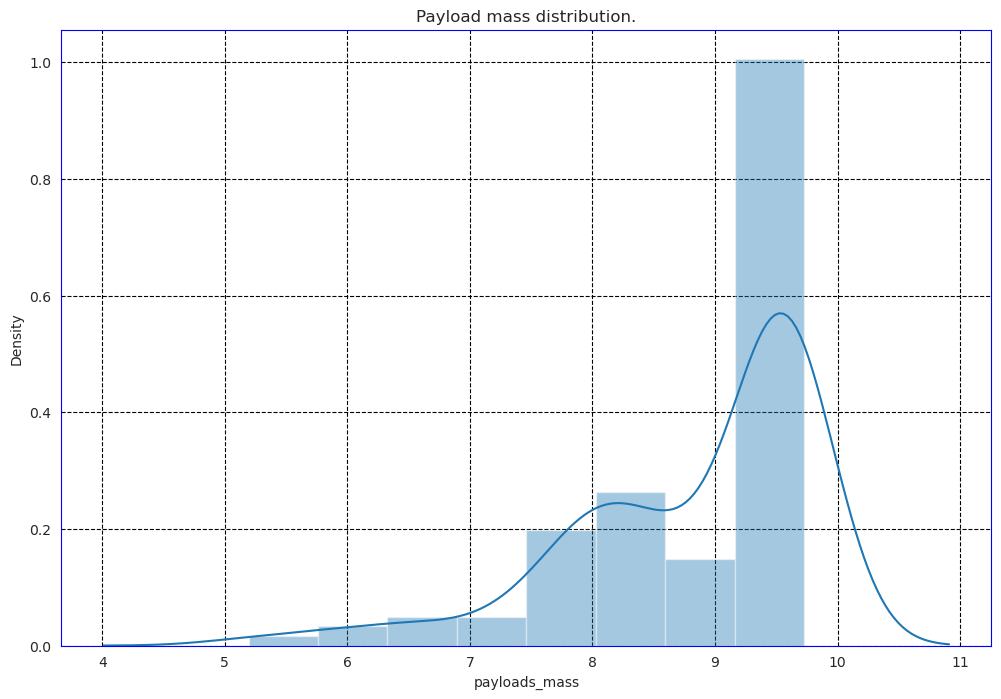

In [80]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [81]:
# YOUR CODE HERE
min_pm = raw_df['payloads_mass'].min()
max_pm = raw_df['payloads_mass'].max()
# mass_range = ?
mass_range = max_pm - min_pm

In [82]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [83]:
# YOUR CODE HERE
lower_interval = int(np.floor(min_pm))
upper_interval = int(np.ceil(max_pm))

# lower_interval =?
# upper_interval =?

In [84]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [85]:
# YOUR CODE HERE
# interval_size =?
# total_bins =?
interval_size = int(np.round(mass_range/4))
total_bins = [i for i in range(lower_interval, upper_interval + interval_size, interval_size)]
total_bins

[180, 4334, 8488, 12642, 16796]

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [86]:
# YOUR CODE HERE
labels = ['bin_no_'+str(i) for i in range(1,len(total_bins))]
labels

['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [87]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(x = raw_df['payloads_mass'], bins=total_bins, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

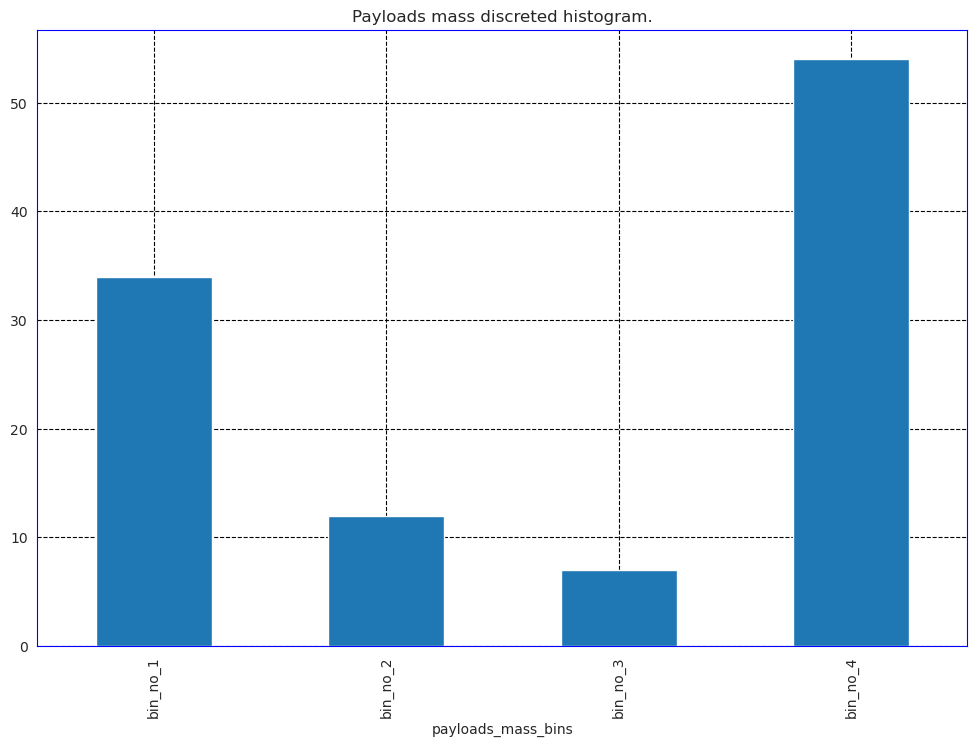

In [88]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
+ Values are unevenly distributed into 4 bins. Mostly the value is concentrated in bins 4 and bins 1. Bins 2 and bins 3 have little value.
+ Bins 3 contains less than 10 values while bins 4 contains more than 50 values
+ Because the data has a skewed distribution, the distribution of values into the 4 bins is also uneven (the intervals of each bin are the same).
+ The bins containing the most values are bins 4 and the least valuable are bins 3. Bins 4 has almost 5 times the number of bins 3

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [89]:
# YOUR CODE HERE
payloads_mass_disccretised, total_bins = pd.qcut(raw_df['payloads_mass'], 4, labels=None, retbins=True, duplicates='raise')
total_bins

array([  180.,  3675., 12690., 14558., 16795.])

- Step 02: Create bin labels

In [90]:
# YOUR CODE HERE
labels = ['bin_no_'+str(i) for i in range(1,len(total_bins))]
labels

['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [91]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(x = raw_df['payloads_mass'], bins=total_bins, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

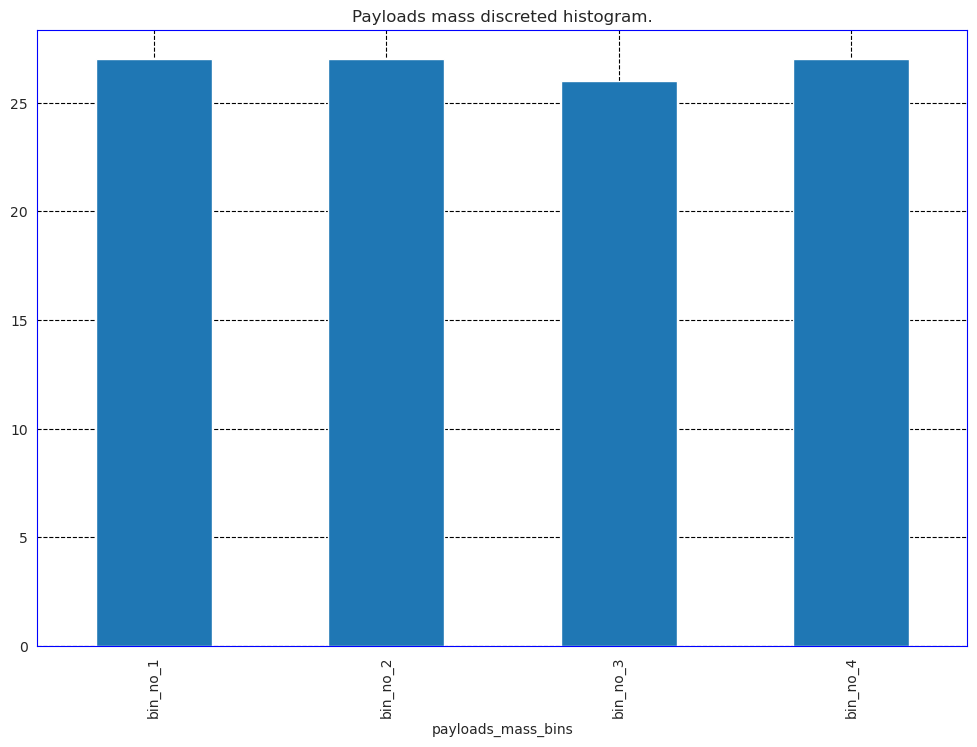

In [92]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

**DECISION TREE DISCRETIZATION**

- **Operation**: Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals:
  + **`Step 1`**: First it trains a decision tree of limited depth (2, 3 or 4) using the variable we want to discretize to predict the target.
  + **`Step 2`**: The original variable values are then replaced by the probability returned by the tree. The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

- **Advantages**:
  + The probabilistic predictions returned decision tree are monotonically related to the target.
  + The new bins show decreased entropy, this is the observations within each bucket/bin are more similar to themselves than to those of other buckets/bins.
  + The tree finds the bins automatically.
 
- **Disadvantages**:
  + It may cause over-fitting
  + More importantly, some tuning of tree parameters might need to be done to obtain the optimal splits (e.g., depth, the minimum number of samples in one partition, the maximum number of partitions, and a minimum information gain). This it can be time-consuming.

I will build a classification tree using the `payloads_mass` to predict `launchpad_name` in order to discretise the `payloads_mass` variable. The newly created variable `payloads_mass_bins` contains the probability of the data point belonging to the corresponding class. Therefore, we can think of the `the probability of the data point` as a `bin`.

I choose `max_depth` = 2 cause a decision tree of depth 2, makes 2 splits, therefore generating 4 buckets, that is why we see 4 different probabilities in the output above.

In [93]:
# YOUR CODE HERE (Optional)
#====================================== DECISION TREE DISCRETIZATION ====================================================
X, y = df[['payloads_mass']], df[['launchpad_name']]

dtree_discretizer = DecisionTreeClassifier(max_depth=2)
dtree_discretizer.fit(X, y)

X['payloads_mass_bins'] = dtree_discretizer.predict_proba(X)[:,1].round(2)

total_bins = pd.concat( [X.groupby(['payloads_mass_bins'])['payloads_mass'].min(),
            X.groupby(['payloads_mass_bins'])['payloads_mass'].max()], axis=1)
total_bins.columns = ['payloads_mass_min', 'payloads_mass_max']
total_bins

,payloads_mass_min,payloads_mass_max
payloads_mass_bins,,
0.16,13632,16145
0.33,1192,9600
0.54,11260,13620
1.00,16250,16795


- Above table display the `payloads_mass` limits buckets generated by the tree by capturing the minimum and maximum `payloads_mass` per each probability bucket to get an idea of the bucket cut-offs.

- As we can see, the decision tree generated the buckets (bins) : `13632-16145`, `1192-9600`, `11260-13620` and `16250-16795` with probabilities of `launchpad_name` of `0.16`, `0.33`, `0.54` and `1.00` respectively

- It can be seen that the ranges of the above bins are not continuous with each other. This means that the upper limit of the previous bin is not continuous with the lower limit of the next bin

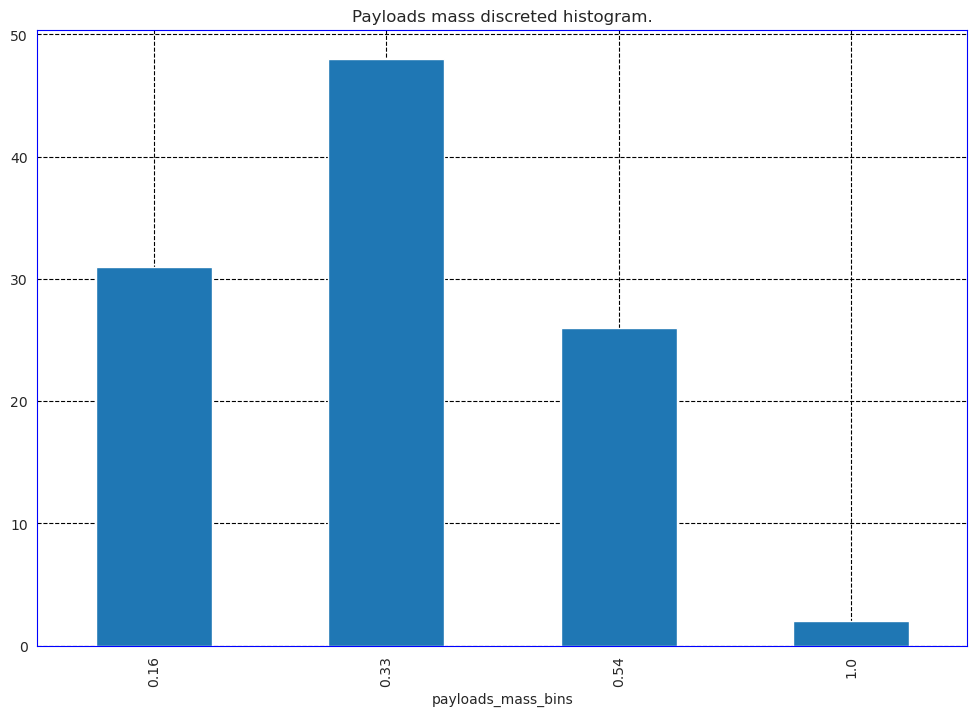

In [94]:
# Visual for Decision Tree Discretization
X.groupby('payloads_mass_bins')['payloads_mass'].count().plot(kind='bar')
plt.title("Payloads mass discreted histogram.");

**Describe my observation from chart**

- In general, the values are arranged unevenly. Most of the sets add average values to bins 1, 2 and 3, while bin 4 contains very few values.
- Bin 2 (`0.33`) contains the maximum number of values and bin 4 (`1.0`) contains the fewest values. While bin 2 contains nearly 50 values, bin 4 contains less than 5 values. This difference is quite large.
- The values are unevenly distributed in the bins because we have not optimized the parameters of DecisionTree. We can get bins with a better distribution of values if we continue to optimize the parameters (e.g. find a more suitable `max_depth`).

YOUR ANSWER HERE (Optional)

**K-MEANS DISCRETIZATION**


K-Means Discretization is a method used to partition continuous data into discrete groups based on the average values of the groups. This method employs the K-Means algorithm to divide data into clusters based on the similarity of data points.
Here are some key points about K-Means Discretization:

- **Operation**:
  + Firstly, the K-Means algorithm is applied to partition the data into clusters.
  + Then, the average value of each cluster is used to represent the values of each group.
  + Finally, data values are assigned to the nearest group (cluster) based on the average value of each cluster.

=> Discretization with k-means requires one parameter, which is k, the number of clusters or the number of bins. We can carry out k-means discretization with scikit-learn.

- **Advantages**:
  + Easy to implement and understand, especially if you are familiar with the K-Means algorithm.
  + The number of clusters can be adjusted to fit the specific data.
  + Allows continuous data to be transformed into discrete form while retaining some of the original information. 
- **Disadvantages**:
  + Depends on the choice of the number of clusters and the initialization of the K-Means algorithm.
  + Not suitable for data with uneven distributions or many outliers.
  + Requires careful inspection to ensure the created groups are meaningful and practical.
  + K-Means Discretization is commonly used in data preprocessing, especially when you want to transform continuous features into discrete form for classification or regression algorithms.
 
In summary, K-Means Discretization is a powerful data preprocessing method that transforms continuous data into discrete form based on meaningful data clusters. This can be useful in many machine learning and data analysis tasks.d data analysis tasks.

In [95]:
# YOUR CODE HERE (Optional)
#====================================== K-MEANS DISCRETIZATION ====================================================
# Create a KBinsDiscretizer object
kmeans_discretizer = KBinsDiscretizer(n_bins=4, strategy='kmeans', encode='ordinal')

# Apply K-Means Discretization to payloads_mass column
raw_df['payloads_mass_bins'] = kmeans_discretizer.fit_transform(raw_df[['payloads_mass']])

# The edges of each bin (total_bins)
kmeans_discretizer.bin_edges_

array([array([  180.        ,  4209.17377622,  9461.26923077, 14251.63793103,
              16795.        ])                                               ],
      dtype=object)

- K-Means Discretization creates 4 bins `0.0`, `1.0`, `2.0` and `3.0` respectively with the range of each bin being respectively: `180-4209`, `4209-9461`, `9461-14251` and `14251-16795`

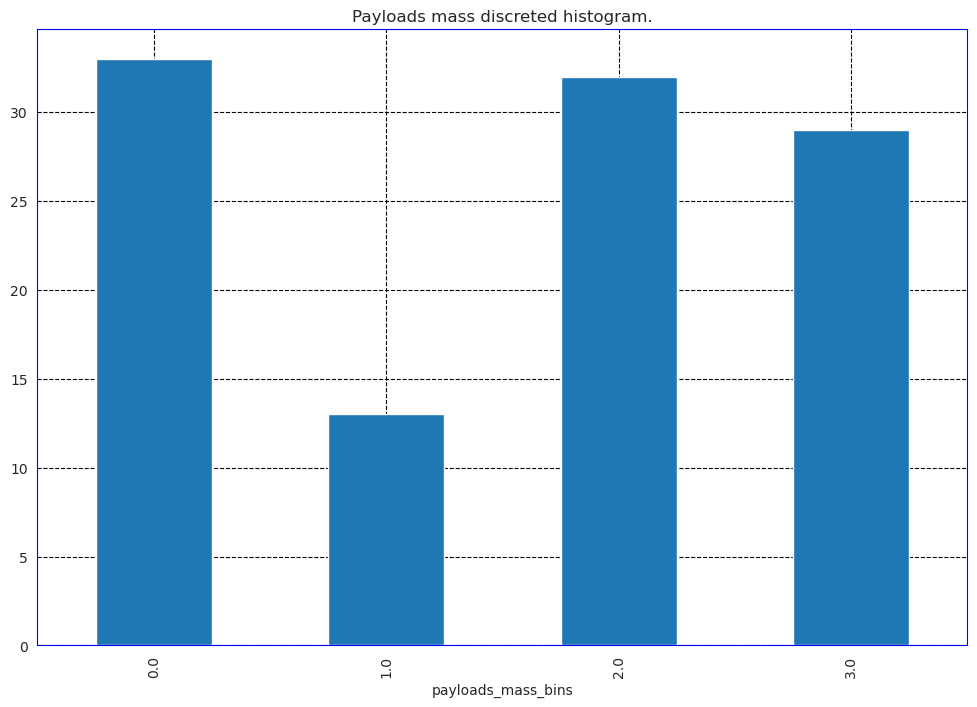

In [96]:
# Visual for K-Means Discretization
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**Describe my observation from chart**

- In general, the distribution values are not too uniform but still better than `Equal Width Discretization`
- Most of the values are concentrated and distributed in bins 1,3 and 4.
- Bin 1 contains the most values (more than 30 values), bin 3 is approximately the same as bin 1 while bin 2 contains the least values, only about 12 values

In [97]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

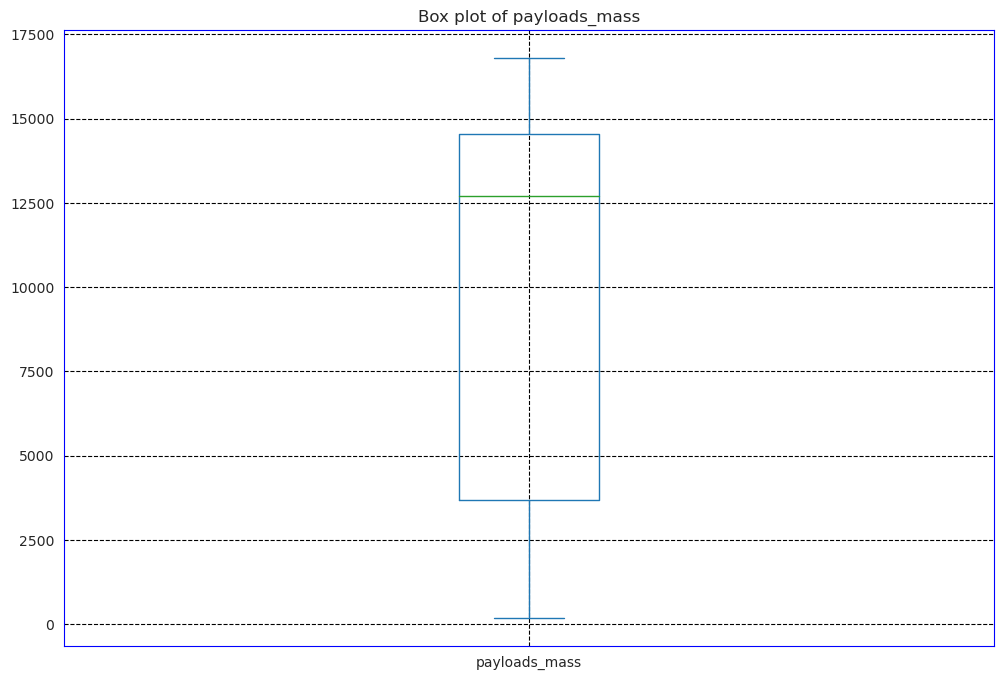

In [98]:
# YOUR CODE HERE
raw_df['payloads_mass'].plot(kind='box', title='Box plot of payloads_mass');

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [99]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -12649.5
The upper bound for payloads limitation: 30882.5


- Step 03: Construct rule for trimming outliers.

In [100]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [101]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((107, 151), (107,))

TODO: What are the advantages and disadvantages of outlier trimming?

YOUR ANSWER HERE

**Advantages**:
+ *Improved Model Performance*: Outliers can significantly affect statistical measures and model performance. Removing outliers can lead to more accurate statistical estimates and better-performing models.
+ *Reduced Sensitivity to Noise*: Outliers are often the result of noise or errors in the data collection process. By removing outliers, the dataset becomes less sensitive to these irregularities, leading to more robust analysis results.
+ *Better Interpretability*: Outliers can distort the interpretation of data patterns and relationships. Removing outliers allows for clearer interpretation of the underlying data trends and relationships.
+ *Normal Distribution Assumption*: Many statistical methods and machine learning algorithms assume that the data follow a normal distribution. Outliers can violate this assumption, leading to biased results. Removing outliers helps ensure that the data conform more closely to the expected distribution.

**Disadvantages**:
+ *Information Loss*: Removing outliers can result in the loss of valuable information, especially if the outliers represent legitimate data points. This can lead to a reduction in the representativeness and completeness of the dataset.
+ *Subjectivity*: The process of identifying outliers and deciding which ones to remove can be subjective and dependent on the judgment of the analyst. Different approaches to outlier detection and removal can lead to different results and interpretations.
+ *Data Manipulation*: Outlier removal involves manipulating the original dataset, which can raise concerns about data integrity and reproducibility. If not performed carefully, outlier removal can introduce bias into the analysis and undermine the credibility of the results.
+ *Model Biases*: Removing outliers based on specific criteria may introduce biases into the analysis, especially if the criteria are arbitrary or poorly chosen. Biased outlier removal can distort the relationships between variables and lead to erroneous conclusions.
+ *Impact on Statistical Tests*: Outlier removal can affect the results of statistical tests and hypothesis testing. Removing outliers may influence the conclusions drawn from these tests and potentially invalidate the statistical significance of the findings.indings.

To summarisery, while outlier trimming can improve model performance and enhance data interpretability, it also carries risks such as information loss, subjectivity, and potential biases. It is essential to carefully consider the trade-offs and implications of outlier removal before applying it to aset





### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

YOUR ANSWER HERE

The IQR (Inter-Quartile Range) distance is typically used to cap outliers via IQR by defining a range within which data points are considered normal and those outside the range are considered outliers. The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

To cap outliers using the IQR method:
1. Calculate IQR: **IQR = Q3 - Q1**, where Q1 is the first quantile and Q3 is the third quantile
2. Define the lower bound: **Lower bound = Q1 - 1.5 IQR**
3. Define the upper bound: **Upper bound = Q3 + 1.5 IQR**
4. The data points that fall below `Lower bound` or above `Upper bound` are outliers

All in all, the IQR distance is used to define a range around the median of the data within which most observations lie. Data points outside this range are flagged as outliers and can be capped or removed from the dataset based on predetermined criteria. This method can be good for Skewed Distributions

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [102]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].mean() + 3 * raw_df['payloads_mass'].std()
lower_bound = raw_df['payloads_mass'].mean() - 3 * raw_df['payloads_mass'].std()
print(f"The lower bound for payloads limitation: {lower_bound}")
print(f"The upper bound for payloads limitation: {upper_bound}")

The lower bound for payloads limitation: -7320.679666257314
The upper bound for payloads limitation: 26446.804899902174


- Step 02: Construct rule for trimming outliers.

In [103]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [104]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((107, 151), (107,))

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

YOUR ANSWER HERE

1. `The advantages and disadvantages of using mean and standard deviation for capping outlier`:
   + **Pros**:
     - Simplicity: Easy to understand and calculate.
     - Reflect Central Tendency: Mean represents average, while standard deviation indicates data dispersion.
    + **Cons**:
      - Sensitive to Outliers: Outliers can skew results significantly.
      - Risk of Removing Legitimate Data: May inadvertently remove valid observations.
      - Not Robust to Skewed Distributions: Less effective with skewed data distributions.
2. `The quartile distance normally used to cap outliers via mean and standard deviation` is that the data points that fall below Mean - 3 * Standard Deviation or above Mean + 3 * Standard Deviation are outliers. The reason for this is because approximately 99.7% of the data points lie within the mean extending 3 SDs left and right (for a normal distribution). Therefore, points outside this range will often be considered outliers because they account for very little in the data and if removed, will not have a big impact on the existing data set.
   

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [105]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].quantile(0.9)
lower_bound = raw_df['payloads_mass'].quantile(0.1)
print(f"The lower bound for payloads limitation: {lower_bound}")
print(f"The upper bound for payloads limitation: {upper_bound}")

The lower bound for payloads limitation: 2200.0
The upper bound for payloads limitation: 15600.0


- Step 02: Construct rule for trimming outliers.

In [106]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [107]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((107, 151), (107,))

TODO: What are the advantages and disadvantages of using Quantiles?

YOUR ANSWER HERE

**Pros**:
+ Easy to use and install
+ Keep the distribution of data intact

**Cons**: 
+ "Interesting" or important data may be lost
+ Not effective for uneven distributions

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [108]:
scaler = StandardScaler()

- Step 02: Fitting

In [109]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [110]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [111]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-2,launch_name_Crew-3,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-76,launch_name_NROL-87,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transporter-1,launch_name_Transporter-2,launch_name_Transporter-3,launch_name_Turksat 5A,launch_name_Türksat 5B,launch_name_ZUMA,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,outcome_Failure,outcome_Success,payloads_type_Crew Dragon,payloads_type_Dragon 1.1,payloads_type_Dragon 2.0,payloads_type_Satellite,payloads_orbit_GEO,payloads_orbit_GTO,payloads_orbit_HCO,payloads_orbit_HEO,payloads_orbit_ISS,payloads_orbit_LEO,payloads_orbit_MEO,payloads_orbit_PO,payloads_orbit_SSO,payloads_orbit_TLI,payloads_orbit_VLEO
0,-0.169842,0.0,-0.191795,-0.155190,-1.052219,-0.427999,0.420071,-1.252363,1.242145,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,-0.097129,10.295630,-

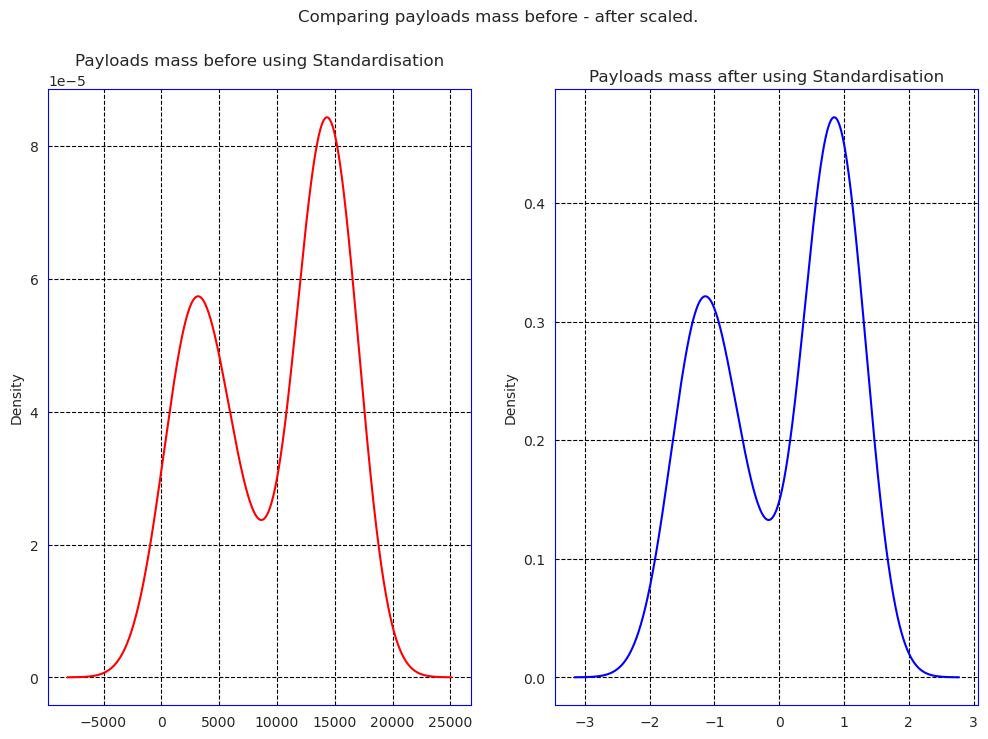

In [112]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before normalization, the values of the column ranged from (5000, 25000), and after normalization, the range has been narrowed to (-3, 3). The range of the column narrowed after normalization, however the density of the values has been larger.
- Looking at the left chart (pre-normalization), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.7 - 0.8. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

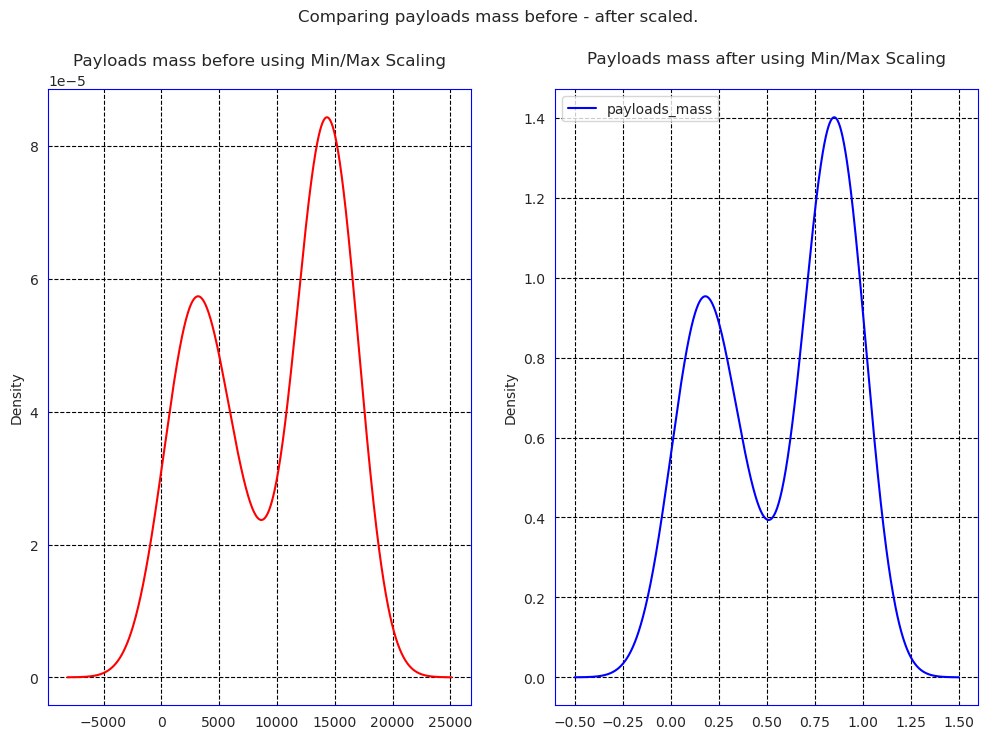

In [113]:
# YOUR CODE HERE
scaler = MinMaxScaler()
scaler.fit(raw_df[['payloads_mass']])

raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns=['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Min/Max Scaling")

raw_df_scaled.plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Min/Max Scaling\n")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before scaling, the values of the column ranged from (5000, 25000), and after scaling, the range has been narrowed to (-0.5, 1.5). The range of the column narrowed after normalization, however the density of the values has been larger.
  
- Looking at the left chart (pre-scaling), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.9. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

- The range of the column after applying Min/Max scaling is smaller than the range after applying Standardization, but the density of the values (on the y-axis) has a wider range.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

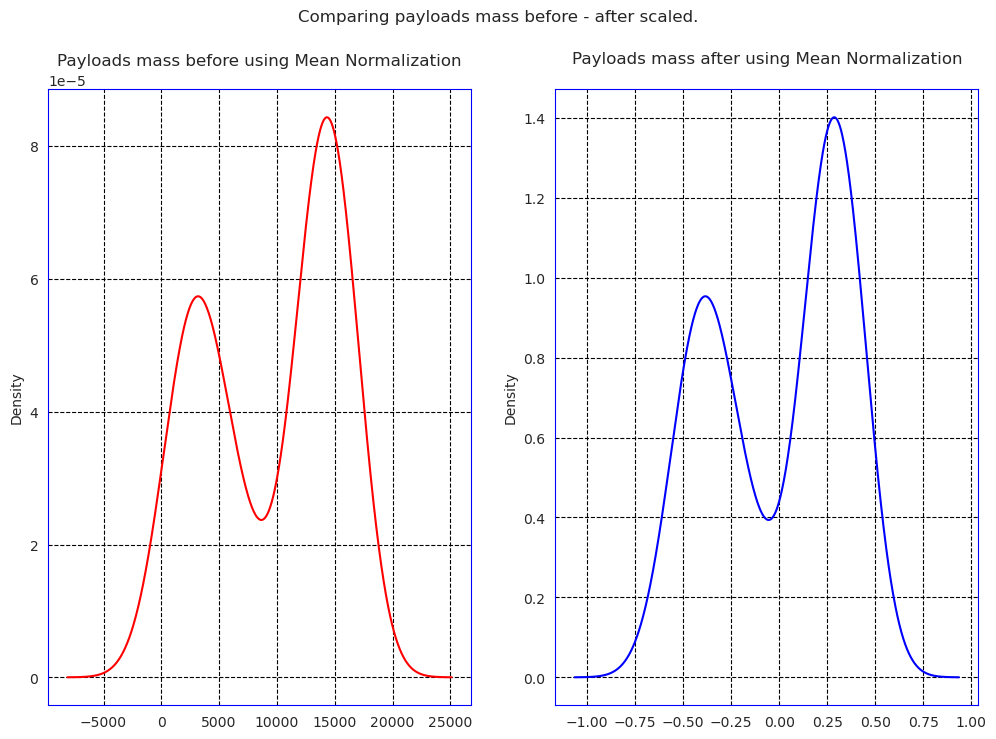

In [114]:
# YOUR CODE HERE
mean_payloads_mass = raw_df['payloads_mass'].mean()
min_payloads_mass = raw_df['payloads_mass'].min()
max_payloads_mass = raw_df['payloads_mass'].max()

raw_df_scaled = (raw_df['payloads_mass'] - mean_payloads_mass) / (max_payloads_mass - min_payloads_mass)

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Mean Normalization")

raw_df_scaled.plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Mean Normalization\n")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before scaling, the values of the column ranged from (5000, 25000), and after scaling, the range has been narrowed to (-1, 1). The range of the column narrowed after normalization, however the density of the values has been larger.
  
- Looking at the left chart (pre-scaling), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.3-0.4. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

- The range of the column after applying Min/Max scaling is smaller than the range after applying Standardization and Min/Max Scaling, but the density of the values (on the y-axis) is the same Min/Max Scaling.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

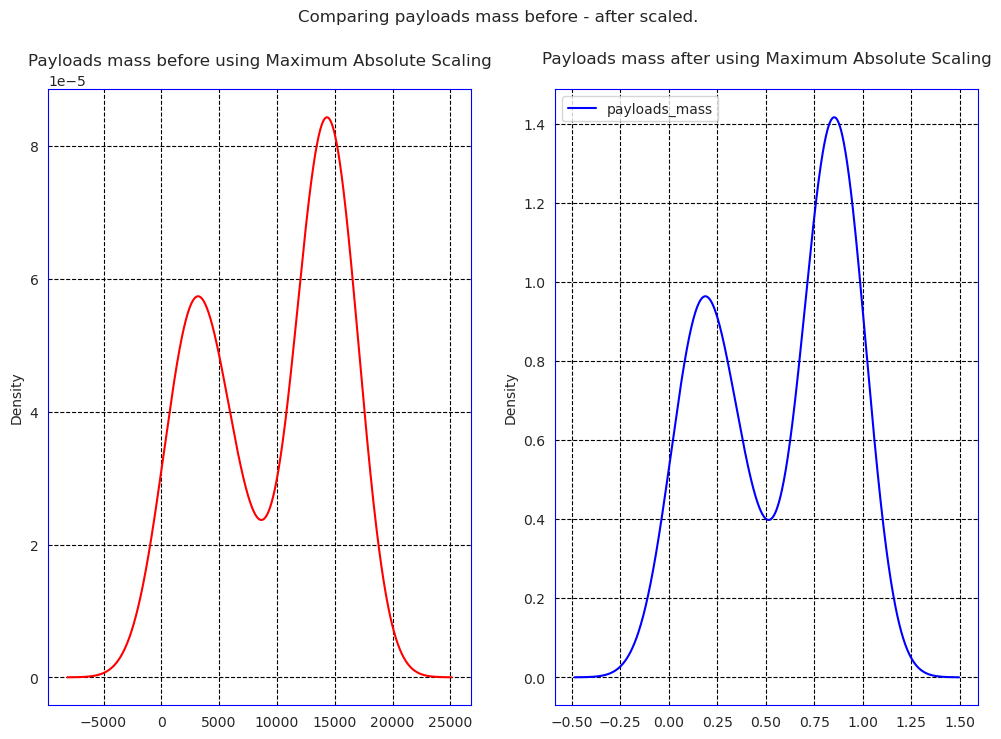

In [115]:
# YOUR CODE HERE
scaler = MaxAbsScaler()
scaler.fit(raw_df[['payloads_mass']])

raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns=['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Maximum Absolute Scaling")

raw_df_scaled.plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Maximum Absolute Scaling\n")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before scaling, the values of the column ranged from (5000, 25000), and after scaling, the range has been narrowed to (-0.5, 1.5). The range of the column narrowed after normalization, however the density of the values has been larger.
  
- Looking at the left chart (pre-scaling), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.9. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

- The range of the column and the density of the values (on the y-axis) after applying Maximum Absolute Scaling is the same the range after applying Min/Max Scaling.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

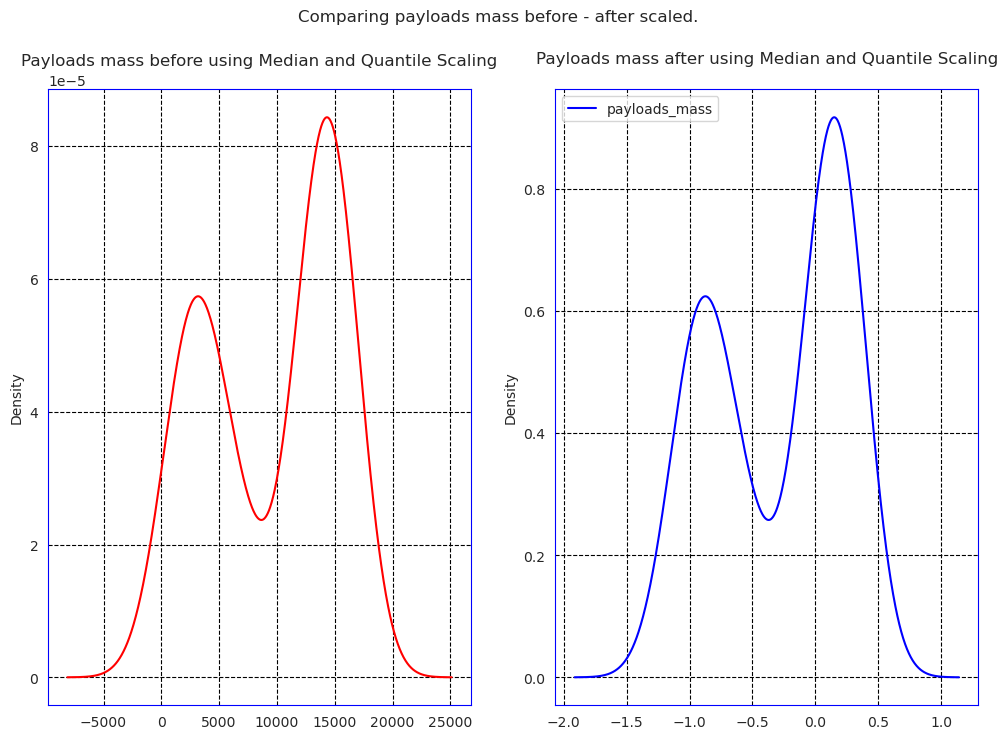

In [116]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(raw_df[['payloads_mass']])

raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns=['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Median and Quantile Scaling")

raw_df_scaled.plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Median and Quantile Scaling\n")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before scaling, the values of the column ranged from (5000, 25000), and after scaling, the range has been narrowed to (-2, 1). The range of the column narrowed after normalization, however the density of the values has been larger.
  
- Looking at the left chart (pre-scaling), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.2. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

- The range of the column after applying Median and Quantile Scaling is only smaller than that of Standardization and wider than the other Scaling methods mentioned above. However, the density of the values (on the y-axis) is smaller compared to the methods above.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

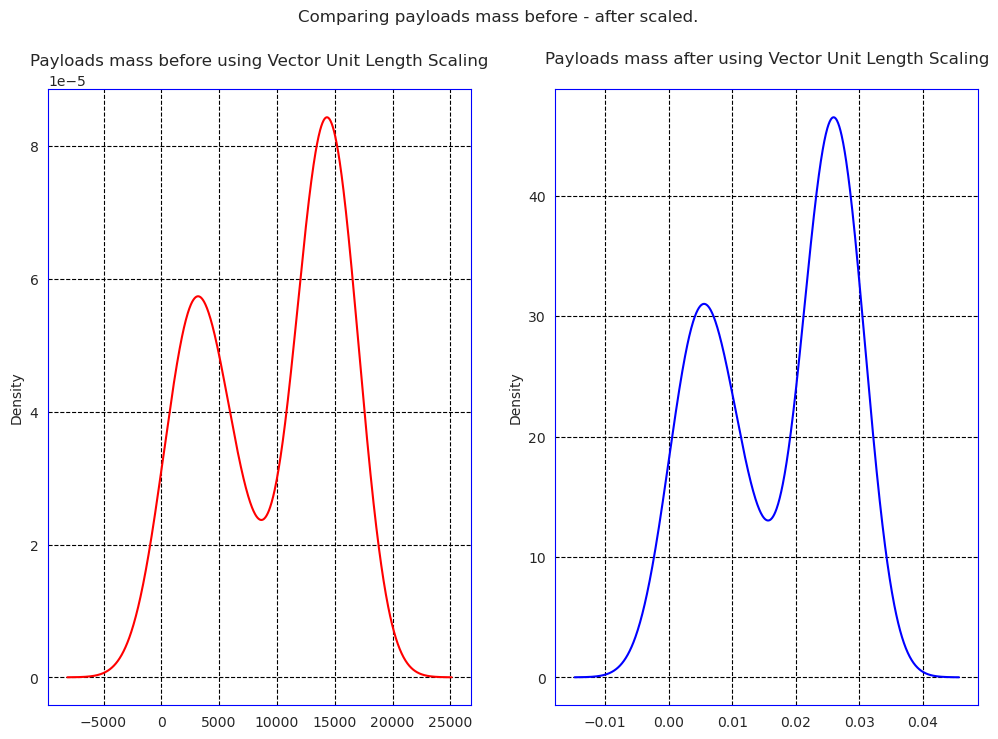

In [117]:
# YOUR CODE HERE
scaler = Normalizer()
scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Vector Unit Length Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Vector Unit Length Scaling\n")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- In general, the distribution shape of the column remains unchanged, but the range of the column has been narrowed. Before scaling, the values of the column ranged from (5000, 25000), and after scaling, the range has been narrowed to (-0.01, 0.). The range of the column narrowed after normalization, however the density of the values has been larger.
  
- Looking at the left chart (pre-scaling), the values with the highest density fall into the range around 14000. Contrasting with the chart after normalization, the range is 0.2. Therefore, it can be concluded that this normalization method narrows the range of the column without altering its distribution shape.

- The range of the column after applying Vector Unit Length Scaling is smallest but the density of the values (on the y-axis) is largest compared to all above scaling methods.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

YOUR ANSWER HERE

Normalization techniques are essential preprocessing steps applied to numerical data in machine learning and data analysis. Here's when and where we should apply these techniques:

- **Pre-Model Training**: Before feeding data into machine learning models, normalization techniques should be applied. This ensures that data is consistently scaled and comparable across features, which can enhance model performance.
- **Numerical Features**: Normalization is typically performed on numerical features or columns of the dataset. These features represent quantitative data like age, income, temperature, etc.
- **Model Requirements**: Different machine learning algorithms may demand specific normalization techniques. For instance:
  + Neural networks often require features to be scaled to similar ranges to prevent certain features from dominating the learning process.
Support Vector Machines (SVMs) and K-Nearest Neighbors (KNN) also benefit from scaled features.
  + Decision trees and random forests, however, are insensitive to feature scaling.

- **Outlier Handlind**: Normalization can aid in managing outliers by scaling data to a particular range. Nonetheless, extreme outliers may still impact normalization, necessitating additional outlier detection and treatment methods.
- **Data Distribution**: Normalization is particularly useful when dealing with features that exhibit varying scales and distributions. It helps in bringing all features to a consistent scale, preventing bias towards certain features during model training.

In conclusion, normalization techniques are crucial preprocessing steps applied to numerical features before model training. However, the selection of a specific normalization method depends on the model requirements and the characteristics of the dataset.

End of your lab 01.